# PyTorch Computer Vision


## 0. Computer Vision libraries in PyTorch
* torchvision - base domain library for PyTorch computer vision
* torchvision.datasets - get dataset and data loading function for computer vision.
* torchvision.models - get pretrained computer vision models that you can leverage for your own problems
* torchvision.transform - function for manipulatin your vision data (images) to be suitable for use with and ML Model
* torchvision.utils.data.Dataset - base dataset class for PyTorch.
* torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import TorchVision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


## 1. Getting a dataset

The dataset that we´ll using is FashionMNIST from torch.vision.datasets

In [ ]:
from torchvision.datasets.mnist import FashionMNIST
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data?
    train = True, # do we want the training dataset? If we puth False we´ll get the testing dataset
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None # how do we want to transform the labels
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
      
  )




In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# See index and label
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# Check the shape
# Image shape --- > (colour_channel, height, width )
print(f'Image shape: {image.shape}, image label: {label}')

Image shape: torch.Size([1, 28, 28]), image label: 9


### 1.2 Visualizing our data


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

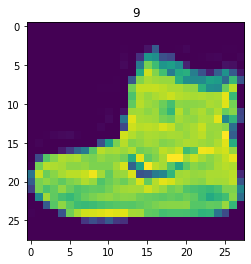

In [ ]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)
# Matplot libe expect colour chanel last

(-0.5, 27.5, 27.5, -0.5)

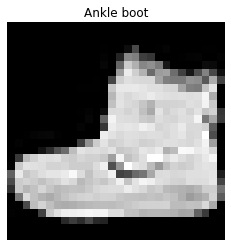

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

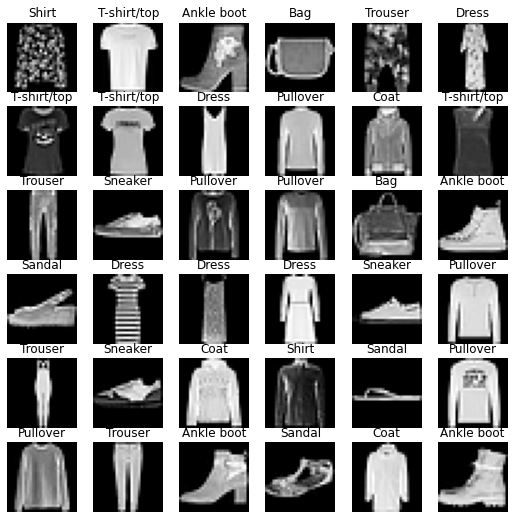

In [ ]:
# Plot more images
torch.manual_seed(2)
fig = plt.figure(figsize=(9,9))
rows, cols = 6, 6
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)



Do you think these items of clothin could be modelled with pure linear lines?

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.

DataLoader, turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardare may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_data_loader = DataLoader(
    dataset = train_data,
    batch_size= BATCH_SIZE,
    shuffle = True
)
test_data_loader = DataLoader(
    dataset = test_data,
    batch_size= BATCH_SIZE,
    shuffle = False
)
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f88b9921390>,
 <torch.utils.data.dataloader.DataLoader at 0x7f88ba38edd0>)

In [ ]:
# Let´s check out what we created

print(f'Dataloaders: {train_data_loader, test_data_loader}')
print(f'lenght Dataloaders: {len(train_data_loader), len(test_data_loader)}')


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f88b9921390>, <torch.utils.data.dataloader.DataLoader object at 0x7f88ba38edd0>)
lenght Dataloaders: (1875, 313)


In [ ]:
# Check out what´s inside the dataloader
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch

(torch.Size([32, 1, 28, 28]),
 tensor([6, 1, 8, 3, 5, 5, 3, 9, 2, 9, 2, 2, 0, 4, 7, 6, 5, 1, 0, 2, 8, 3, 0, 5,
         5, 0, 3, 4, 2, 0, 3, 6]))

Image size: torch.Size([1, 28, 28])
Label: 5, label_size: torch.Size([])


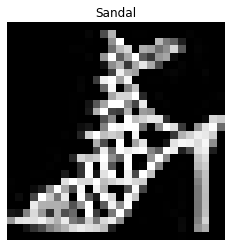

In [ ]:
# Show a sample
# torch.manual_seed(4)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, label_size: {label.shape}')



## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiemnts, it´s best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.



In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample 
x = train_features_batch[0]
# Flatten the sample
output = flatten_model(x) # perfom the forward pass

# Print out what happen

print(f'Shape before flatten {x.shape}')# ---> (color_chanels, height, width)
print(f'Shape after flatten {output.shape}') # ---> (color, height * width)

# 

Shape before flatten torch.Size([1, 28, 28])
Shape after flatten torch.Size([1, 784])


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
                     input_shape: int,
                     hidden_units: int,
                     output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features= hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
    )
  def forward(self, x):
    return self.layer_stack(x)


torch.manual_seed(42)
# Set up model with imput parameters
model_0 = FashionMNISTModelV0(input_shape = 784,# input shape 28 * 28
                              hidden_units = 10, # How many units in the hidden layer
                              output_shape = 10).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
y_dummy = model_0(dummy_x)
print(y_dummy.shape)
y_dummy


torch.Size([1, 10])


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we´re working with multiclass data, our loss functon will be nn.CrossEntropyLoss()
* Optimizer - our optimizer torch.optim.SGD() (stochastic gradient descent)
* Evaluation metric - since we´re working on a classification problemn. We´ll use Accuracy

In [ ]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch
if Path("helper_functions.py").is_file():
  print('Already exists')
else:
  print('Downloading')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py",'wb') as f:
    f.write(request.content)

Already exists


In [ ]:
# Import accuracy function
from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

In [ ]:
# Training loop
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42) 


### 3.2 Creating a function to time our experiments

Machine Learning es very experimental.

Two main things you´ll often want to track are:
1. Model´s perfomance ( loss and accuracy values, etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time"""
  total_time = end - start
  print(f'Training time on {device}: Total time: {total_time:.3f} seconds')
  return total_time

In [ ]:
start_time = timer()
# some code ....
end_time = timer()
print_train_time(start_time, end_time, device = 'cpu')

Training time on cpu: Total time: 0.000 seconds


4.9636999847280094e-05

### 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perfom training steps, calculate the train loss *per batch*
3. Loop though testing batches, perfom testting steps, calculate the test loss *per batch*.
4. Print out what´s happening,
5. Time it all 

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set number of epochs (we´ll keep this small for faster training time)
epochs = 3

# Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}-----' )
  ### Training
  train_loss = 0
  # Add a loop to loop throug the training batches
  for batch, (X, y) in enumerate(train_data_loader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the loss
    # 3. Zero grad
    optimizer.zero_grad()
    # 4. backward
    loss.backward()
    # 5. Step
    optimizer.step()

    # Print out what´s happening
    if batch % 400 == 0:
      print(f' Looked at {batch * len(X)}/{(len(train_data_loader.dataset))} ')
  
  # Divide total train loss by lenth of train dataloader
  train_loss /= len(train_data_loader)

  ### Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_data_loader:
      # 1. Test pred
      test_pred = model_0(X_test)
      # 2. calculate the loss
      test_loss += loss_fn(test_pred, y_test)
      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_data_loader)
    test_acc /= len(test_data_loader)
    # Print out whats happening

  print(f'Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

print(f'Total time to train: {total_train_time_model_0:.4f}')







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0-----
 Looked at 0/60000 
 Looked at 12800/60000 
 Looked at 25600/60000 
 Looked at 38400/60000 
 Looked at 51200/60000 
Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1-----
 Looked at 0/60000 
 Looked at 12800/60000 
 Looked at 25600/60000 
 Looked at 38400/60000 
 Looked at 51200/60000 
Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2-----
 Looked at 0/60000 
 Looked at 12800/60000 
 Looked at 25600/60000 
 Looked at 38400/60000 
 Looked at 51200/60000 
Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Training time on cpu: Total time: 33.377 seconds
Total time to train: 33.3772


In [ ]:
# time 25.733042235999164

## 4. Make predictions and get Model 0 result

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dicctionary containing the results of model predictiong on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions
      y_pred = model(X)
      # Accumulate the loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/avg
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc":acc,
          }
# Calculate model 0 results on test dataset

model_0_results = eval_model(model_0, test_data_loader, loss_fn, accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### Setup device agnostic-code (for using gpu)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model_1 = FashionMNISTModelV0(input_shape = 784,# input shape 28 * 28
                              hidden_units = 10, # How many units in the hidden layer
                              output_shape = 10).to(device)


In [ ]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
                      [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
                      [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
                      ...,
                      [-0.0344,  0.0127, -0.0325,  ..., -0.0011, -0.0230,  0.0257],
                      [ 0.0291,  0.0243, -0.0006,  ...,  0.0001,  0.0176, -0.0147],
                      [ 0.0053, -0.0194, -0.0170,  ...,  0.0205, -0.0093,  0.0283]])),
             ('layer_stack.1.bias',
              tensor([-0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,  0.0163,
                       0.0069, -0.0078])),
             ('layer_stack.2.weight',
              tensor([[ 0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,  0.2847,
                       -0.1495,  0.1344],
                      [-0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,  0.

## 6. Model 1: Building a Non-Linear model

We learned the power of non-linearity. 

In [ ]:
# Create a model with non-linear and linear layers

class FashionNMISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),# flatten inputs into a single vector
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=output_shape),
        nn.ReLU()
    ) 
  
  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)




In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionNMISTModelV1(784,
                            10,
                            len(class_names)).to(device)




In [ ]:
# Create a loss and an optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model_1.parameters(),
    lr=0.1
)

### 6.2 Functionazing training and evaluation/testing loops
 
 Let´s create a function for:
 * Training loop -train step
 * Testiong loop - test step

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm


def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device: torch.device = device):

  """Perfom a training with model trying to learn on data_loader"""

  train_loss,train_acc = 0,0
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate the loss and accuracy
    loss = loss_fn(y_pred, y)
    train_loss += loss 
    train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
    # 3. Zero grad
    optimizer.zero_grad()
    # 4. backward
    loss.backward()
    # 5. Step
    optimizer.step()

  # Divide total train loss by lenth of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f'Train loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%')
    



def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Perfoms a testing loop step on model going over data_loader"""
  ### Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. Test pred
      test_pred = model(X)
      # 2. calculate the loss
      test_loss += loss_fn(test_pred, y)
      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1)) 

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  # Print out whats happening
  print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%')










In [ ]:
from timeit import default_timer as timer

torch.manual_seed(42)

epochs = 3

train_time_start_on_gpu = timer()
for epoch in range(epochs):

  print(f'Epoch: {epoch}--------------------')
  train_step(model_1, train_data_loader, loss_fn, optimizer, accuracy_fn, device)
  test_step(model_1, test_data_loader, loss_fn, accuracy_fn, device)



train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = str(next(model_0.parameters()).device))

print(f'Total time to train: {total_train_time_model_0:.4f}')

Epoch: 0--------------------
Train loss: 1.09199 | Train Acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1--------------------
Train loss: 0.78101 | Train Acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2--------------------
Train loss: 0.67027 | Train Acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Training time on cpu: Total time: 28.330 seconds
Total time to train: 33.3772


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  """Returns a dicctionary containing the results of model predictiong on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)
      # Accumulate the loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/avg
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc":acc,
          }

In [ ]:
# Get model_1 results dicctioary
model_1_results = eval_model(model = model_1,
                              data_loader = train_data_loader,
                              loss_fn = loss_fn,
                              accuracy_fn = accuracy_fn,
                              device=device)

In [ ]:
model_1_results

{'model_name': 'FashionNMISTModelV1',
 'model_loss': 0.6430192589759827,
 'model_acc': 76.42833333333333}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN´S are also known ConvNets.

CNN´S are knowk for their capabilities to find patters in images

In [ ]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  """
    Model archichecture that replicates the tinyVGG model from CNN explainer website
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1), # Values we can set ourselves in our NN´s are caller hyperparameters.
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
      )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7,
                  out_features=output_shape)
    )
    
  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


In [ ]:

device

'cpu'

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape = 1,
    hidden_units = 30,
    output_shape = len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

### 7.1 Stepping throug  nn.Conv2d

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.rand(size=(32,3,64,64))
test_image = images [0]

print(f'Image batch shape: {test_image.shape}')
print(f'Data shape: {images.shape}')

print(f'Teste image:{test_image}')

Image batch shape: torch.Size([3, 64, 64])
Data shape: torch.Size([32, 3, 64, 64])
Teste image:tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.

In [ ]:
# Create a single conv2d layer

conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding=0)

# Pass the data through the convolutional layer

conv_output = conv_layer(test_image)
conv_output
print(f'Shape: {conv_output.shape}')

Shape: torch.Size([10, 62, 62])


### 7.2 Stepping through 'nn.MaxPool2d()

In [ ]:
# Print out original image shape
test_image.shape

# Create a sample nn.MaxPool2d layer

max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass through the Conv2d
test_image_through_conv = conv_layer(test_image)
print(test_image_through_conv.shape)

# Pass through max pool
test_image_throug_max_pooling = max_pool_layer(test_image_through_conv)
print(test_image_throug_max_pooling.shape)


torch.Size([10, 62, 62])
torch.Size([10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimension

test_img = torch.randn(size=(1,1,2,2))
test_img

# Create a max pool layer

max_pool = nn.MaxPool2d(
    kernel_size = 2
)

# Pass the random tensor
max_pool_tensor = max_pool(test_img)
print(f'Max pool tensor: {test_img}')
print(f'Max pool tensor: {max_pool_tensor}')
print(f'Max pool tensor: {test_img.shape}')
print(f'Max pool tensor: {max_pool_tensor.shape}')


Max pool tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor: torch.Size([1, 1, 2, 2])
Max pool tensor: torch.Size([1, 1, 1, 1])


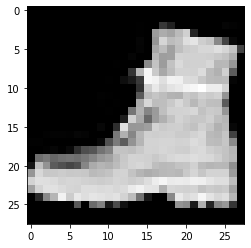

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')

In [ ]:

rand_image = torch.randn(size=(1,28,28)).to(device)
rand_image.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
with torch.inference_mode():
  model_2(rand_image.unsqueeze(0))

### 7.3 Setting up loss function and optimizer for model_2

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.1)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight', tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
                    

### 7.4 Training and testing model_2 using our training and test function

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()
epochs = 3
for epoch in range(epochs):
  print(f'Epoch: {epoch}')
  train_step(
      model_2,
      data_loader= train_data_loader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
      device = device)
  test_step(model=model_2,
            data_loader = test_data_loader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)
  
train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

Epoch: 0
Train loss: 0.60134 | Train Acc: 78.40%
Test loss: 0.36371 | Test acc: 86.78%
Epoch: 1
Train loss: 0.33428 | Train Acc: 87.96%
Test loss: 0.31693 | Test acc: 88.57%
Epoch: 2
Train loss: 0.28881 | Train Acc: 89.67%
Test loss: 0.28348 | Test acc: 89.84%
Training time on cpu: Total time: 402.329 seconds


In [ ]:
# Get results dicctionary.

model_2_results = eval_model(
    model = model_2,
    data_loader = test_data_loader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28348004817962646,
 'model_acc': 89.83626198083067}

In [ ]:
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

In [ ]:
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionNMISTModelV1,0.643019,76.428333
2,FashionMNISTModelV2,0.283480,89.836262


In [ ]:
# Add training time to results comparision
compare_results['training_time'] =[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2,]

In [ ]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,33.377222
1,FashionNMISTModelV1,0.643019,76.428333,28.329871
2,FashionMNISTModelV2,0.283480,89.836262,402.328512


Text(0, 0.5, 'model')

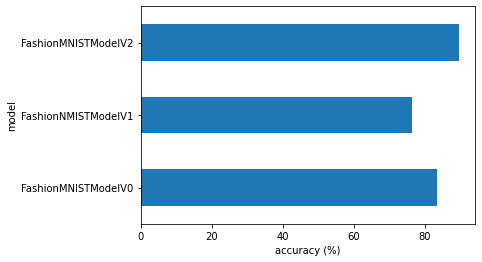

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

In [ ]:
## 9. Make and evaluate random predictions with best model 

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      # Forward pass
      pred_logits = model(sample)
      # Get prediction probabilities
      pred_prob = torch.softmax(pred_logits.squeeze(),dim = 0)

      # Get pred prob off gpu for futher calculations
      pred_probs.append(pred_prob.cpu())
    # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

  # View the first sample hape

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

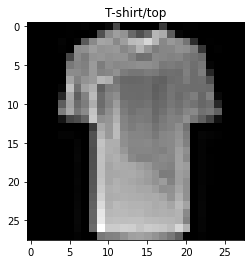

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions

pred_probs = make_predictions(
    model_2,
    data=test_samples
)
# View first two predictions
pred_classes = pred_probs.argmax(dim=1)

In [ ]:
pred_classes


tensor([0, 5, 4, 9, 2, 2, 0, 6, 6])

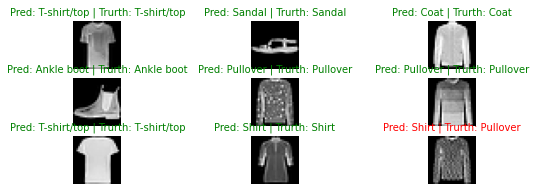

In [ ]:
# Plot figure
plt.figure(figsize=(9,3))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the true label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Trurth: {truth_label}"

  # Check for equality
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)

## 10. Making a confunsion matrix for furthe prediction evaluation

A confusion matrix is a fantastic way of evaluation your classification models

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix with torchmetrics.ConfusionMatrix
3. Plot the confusion matrixs using mlxtend.plotting.plot_confusion_matrix()

In [ ]:
from tqdm.auto import tqdm
# Make prediciton with model_2

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_data_loader, desc='Making predictions ...'):
    # send data and target to target device
    X, y = X.to(device), y.to(device)
    #Do the forward pass
    y_logits = model_2(X)
    # Turn prediction from logits to prob
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluaton
    y_preds.append(y_pred.cpu())

# Concateneate list of predictions into a tensor

#print(y_preds)
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:10]


Making predictions ...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# See if required packages are installed and if not, install them
try:
  import torchmetrics, mlxtend
  print(f'mlextend: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split(".")[1]>=19, 'mlxtend version should be 0.19.9 or higher')
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f'mlxtend verison: {mlxtend.__version__}')


mlextend: 0.21.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mlxtend verison: 0.21.0


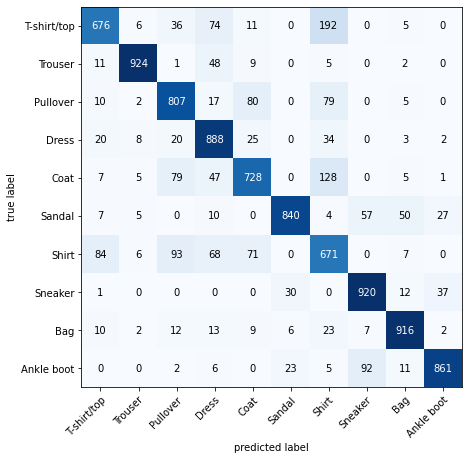

In [ ]:
# Making a confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instnace and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names))
confmat_tensor = confmat(preds = y_preds_tensor, target = test_data.targets)


# 3. Plot the confusion matrix

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)


## 11. Save and load best performing model

In [ ]:
from pathlib import Path
# Create a model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create model save

MODEL_NAME = "03_pytorch_computer_vision_model_2_path"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict

print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to models/03_pytorch_computer_vision_model_2_path


In [ ]:
# Create a new instance 
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units = 30,
    output_shape = len(class_names)
)

# Load in save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate the model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_data_loader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

In [ ]:
model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28348004817962646,
 'model_acc': 89.83626198083067}

In [ ]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28348004817962646,
 'model_acc': 89.83626198083067}

In [ ]:
# Check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02) # Absolute tolerance

tensor(True)